In [1]:
#Rafael Leinio Pereira 103238
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from copy import copy, deepcopy
def limites (n, minn = 0, maxn = 255): #coloca range de números entre 0 e 255
    return max(min(maxn, n), minn)

In [2]:
einstein = cv2.imread("einstein_ruido_salpimenta.jpg",0)
print (einstein)

[[ 52  48  44 ... 156 151 165]
 [ 63  61  57 ... 150 160 163]
 [ 63  64  63 ... 165 166 138]
 ...
 [ 95 103 107 ...  63  72  75]
 [255 132 125 ...  67  74  75]
 [ 86  84 109 ...  70  75  76]]


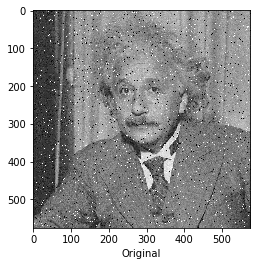

In [3]:
plt.figure()
plt.imshow(einstein,cmap='gray', vmin=0, vmax=255)
plt.xlabel("Original")
plt.show()

In [16]:
#função de filtro para aplicar máscaras de qualquer dimensão com modos de soma, média e mediana dos resultados

def filter (kernel, image, mode): 
    new_image = deepcopy(image)
    kernel_center = (kernel.shape[0]//2,kernel.shape[1]//2)
    #percorrendo pixels da imagem para aplicar o kernel
    for l in range(new_image.shape[0]):
        for c in range(new_image.shape[1]):
            #aplicando cada operação do kernel
            results  = [];
            for lk in range(kernel.shape[0]):
                for ck in range(kernel.shape[1]):
                    image_xy = (l - (kernel_center[0] - lk), c - (kernel_center[1] - ck)) #correspondecia xy na imagem original
                    try:
                        result = image[image_xy[0]][image_xy[1]] * kernel[lk][ck] #operação no pixel da imagem original
                        results.append(result)
                    except IndexError: #se tiver fora dos índices não faz nada
                        continue
            #aplicando resultado naquele pixel da imagem
            if (mode == 'sum'): #soma os resultados
                new_image[l][c] = int(limites(np.sum(results)))
            if (mode == 'median'): #mediana dos resultados
                new_image[l][c] = int(limites(np.median(results)))
            if (mode == 'mode'): #moda dos resultados
                new_image[l][c] = int(limites(stats.mode(results)[0][0]))
            if (mode == 'max'): #maximo dos resultados
                new_image[l][c] = int(limites(np.max(results)))
            if (mode == 'min'): #minimo dos resultados
                new_image[l][c] = int(limites(np.min(results)))
    return new_image

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


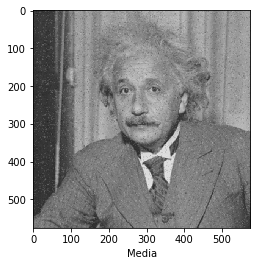

In [17]:
#1
#Média
kernel = (np.ones((3,3)))/9
print kernel
avg = filter(kernel,einstein,'sum')
plt.figure()
plt.imshow(avg,cmap='gray', vmin=0, vmax=255)
plt.xlabel("Media")
plt.show()

[[1 1 1]
 [1 1 1]
 [1 1 1]]


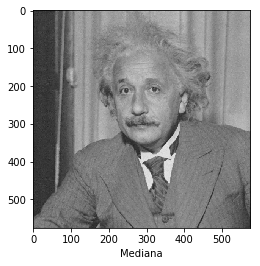

In [18]:
#Mediana
kernel = np.ones((3,3),dtype=int)
median = filter(kernel,einstein,'median')
print kernel
plt.figure()
plt.imshow(median,cmap='gray', vmin=0, vmax=255)
plt.xlabel("Mediana")
plt.show()

[[1 1 1]
 [1 1 1]
 [1 1 1]]


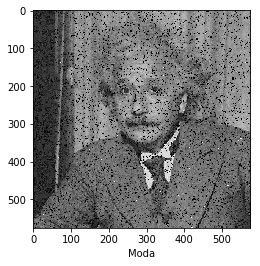

In [ ]:
#Moda
kernel = np.ones((3,3),dtype=int)
mode = filter(kernel,einstein,'mode')
print kernel
plt.figure()
plt.imshow(mode,cmap='gray', vmin=0, vmax=255)
plt.xlabel("Moda")
plt.show()

In [ ]:
#gaussiana
kernel = np.array([
    [1,4,6,4,1],
    [4,16,24,16,4],
    [6,24,36,24,6],
    [4,16,24,16,4],
    [1,4,6,4,1]],dtype=float)/256
gauss = filter(kernel,einstein,'sum')
print kernel
plt.figure()
plt.imshow(gauss,cmap='gray', vmin=0, vmax=255)
plt.xlabel("Gaussiana")
plt.show()

In [ ]:
#min
kernel = np.ones((3,3),dtype=int)
minn = filter(kernel,einstein,'min')
print kernel
plt.figure()
plt.imshow(minn,cmap='gray', vmin=0, vmax=255)
plt.xlabel("Min")
plt.show()

In [ ]:
#max
kernel = np.ones((3,3),dtype=int)
maxx = filter(kernel,einstein,'max')
print kernel
plt.figure()
plt.imshow(maxx,cmap='gray', vmin=0, vmax=255)
plt.xlabel("Max")
plt.show()

In [ ]:
#3
lena = cv2.imread("lena.jpg",0)
#h1
kernel = np.array(
    [[0,-1,0],
    [-1,4,-1],
    [0,-1,0]])
h1 = filter(kernel,lena,'sum')
print kernel
plt.figure()
plt.imshow(h1,cmap='gray', vmin=0, vmax=255)
plt.xlabel("h1")
plt.show()
print h1

In [1]:
#3
#h2
kernel = np.array(
    [[-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]])
h2 = filter(kernel,lena,'sum')
print kernel
plt.figure()
plt.imshow(h2,cmap='gray', vmin=0, vmax=255)
plt.xlabel("h2")
plt.show()

NameError: name 'np' is not defined

[[ 52  48  44 ... 156 151 165]
 [ 63  61  57 ... 150 160 163]
 [ 63  64  63 ... 165 166 138]
 ...
 [ 95 103 107 ...  63  72  75]
 [255 132 125 ...  67  74  75]
 [ 86  84 109 ...  70  75  76]]
[[ 57  55  57 ...  94  68  35]
 [ 61  57  55 ... 125  87  44]
 [ 57  55  57 ... 156 103  49]
 ...
 [ 83  97 111 ...  52  60  24]
 [ 71  74  73 ...  54  62  16]
 [ 26  27  31 ...  20  16  71]]


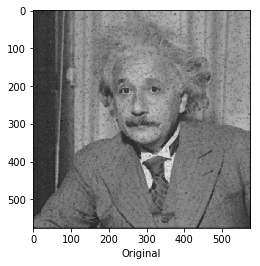

In [13]:
#2
#Tomita e Tsuji

def filter_border_preservation(image,kernels):#função para filtragem com preservação de bordas, tem como entrada a image e um vetor de kernels   
    new_image = deepcopy(image)
    kernel_center = (kernels[0].shape[0]//2,kernels[0].shape[1]//2)
    #percorrendo pixels da imagem para aplicar o kernel
    for l in range(new_image.shape[0]):
        for c in range(new_image.shape[1]):
            kernels_results = []
            for kernel in kernels: #aplicar todos os kernels
                #aplicando cada operação do kernel
                results  = [];
                for lk in range(kernel.shape[0]):
                    for ck in range(kernel.shape[1]):
                        image_xy = (l - (kernel_center[0] - lk), c - (kernel_center[1] - ck)) #correspondecia xy na imagem original
                        try:
                            result = image[image_xy[0]][image_xy[1]] * kernel[lk][ck] #operação no pixel da imagem original
                            results.append(result)
                        except IndexError: #se tiver fora dos índices não faz nada
                            continue
                kernels_results.append(results)
            #print ("pixel ",l," ",c," resultados: ")
            #print(kernels_results)
            variances = []
            for result in kernels_results: #calcula a variancia de cada kernel
                variances.append(np.var(result))
            i = np.argmin(variances) #pega o index da menor variancia
            avg = np.sum(kernels_results[i])/9 #média do kernel de menor variacia
            new_image[l][c] = int(limites(avg)) #colocando no pixel da imagem nova
    return new_image
#definindo filtros
a = np.array([
[1,1,1,0,0],
[1,1,1,0,0],
[1,1,1,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
])
b = np.array([
[0,0,1,1,1],
[0,0,1,1,1],
[0,0,1,1,1],
[0,0,0,0,0],
[0,0,0,0,0],
])
c = np.array([
[0,0,0,0,0],
[0,0,0,0,0],
[1,1,1,0,0],
[1,1,1,0,0],
[1,1,1,0,0],
])
d = np.array([
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,1,1,1],
[0,0,1,1,1],
[0,0,1,1,1],
])
e = np.array([
[0,0,0,0,0],
[0,1,1,1,0],
[0,1,1,1,0],
[0,1,1,1,0],
[0,0,0,0,0],
])

kernels = np.array([a,b,c,d,e])
new_image = filter_border_preservation(einstein,kernels)
print(einstein)
print(new_image)
plt.figure()
plt.imshow(new_image,cmap='gray', vmin=0, vmax=255)
plt.xlabel("Original")
plt.show()

In [12]:
np.var([2,3,3,2,2])

0.24